In [1]:
# import statistical packages
import numpy as np
import pandas as pd

# import data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import Weekly data
url = "../../Data/Auto.csv"
Auto = pd.read_csv(url)

In [3]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    int64  
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.0+ KB


In [5]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.196474,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.357393,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# Auto = Auto.drop(Auto.index[[32, 126, 330, 336, 354]])
# Auto['hp'] = Auto['horsepower'].astype(float) # horsepower imports in my dataframe as string. So I convert it to float
# Auto.drop(columns = 'horsepower', inplace = True)
# Auto.reset_index(drop=True, inplace = True)

**11.a. Create a binary variable mpg01 with values > median of mpg as 1 and 0 otherwise**

In [6]:
mpg_median = Auto['mpg'].median()
mpg_median

23.0

In [7]:
# create binary variable 'mpg01', 1 if > 'mpg_median', else 0
Auto['mpg01'] = np.where(Auto['mpg'] > mpg_median, 1, 0)

In [9]:
# mpg01 = pd.DataFrame(columns=['mpg01'])
# Auto = pd.concat([mpg01, Auto], axis = 1)

In [14]:
# index = Auto.index

In [15]:
# for i in index:
#     if Auto.iloc[i]['mpg'] > mpg_median:
#         Auto.at[i, 'mpg01'] = int(1)
#     else:
#         Auto.at[i, 'mpg01'] = int(0)

In [8]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


In [9]:
Auto.mpg01.dtype

dtype('int64')

In [10]:
cols = Auto[['cylinders', 'displacement', 'weight', 'acceleration',
       'year', 'origin', 'horsepower']]

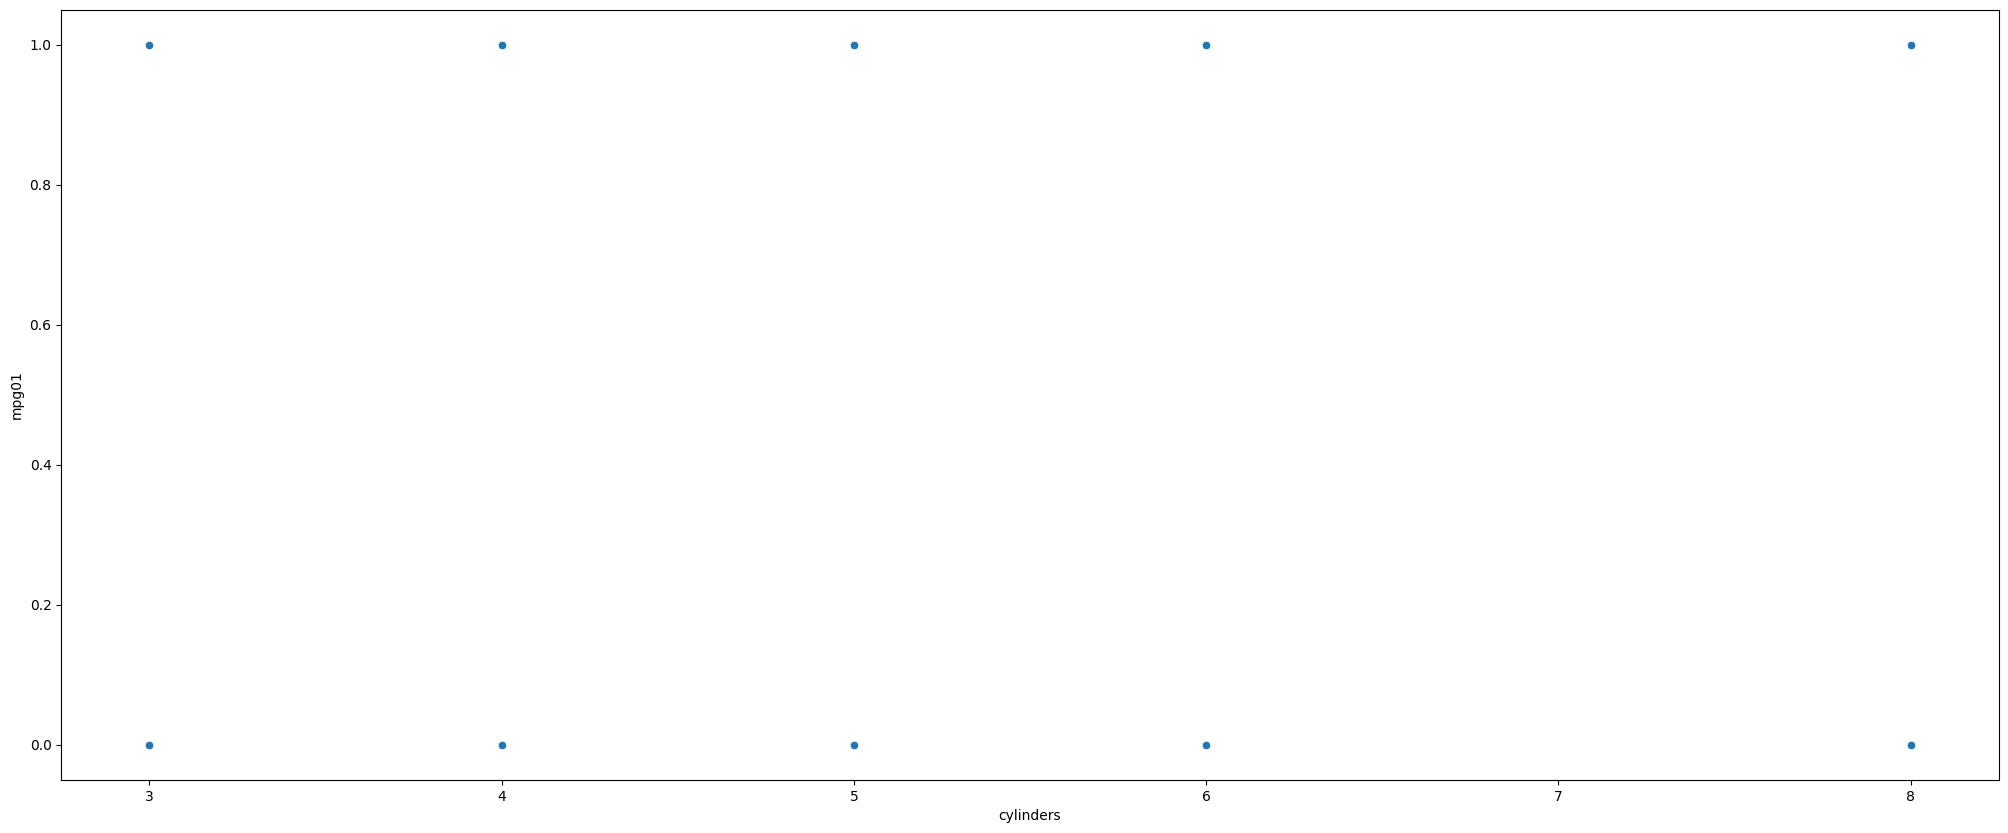

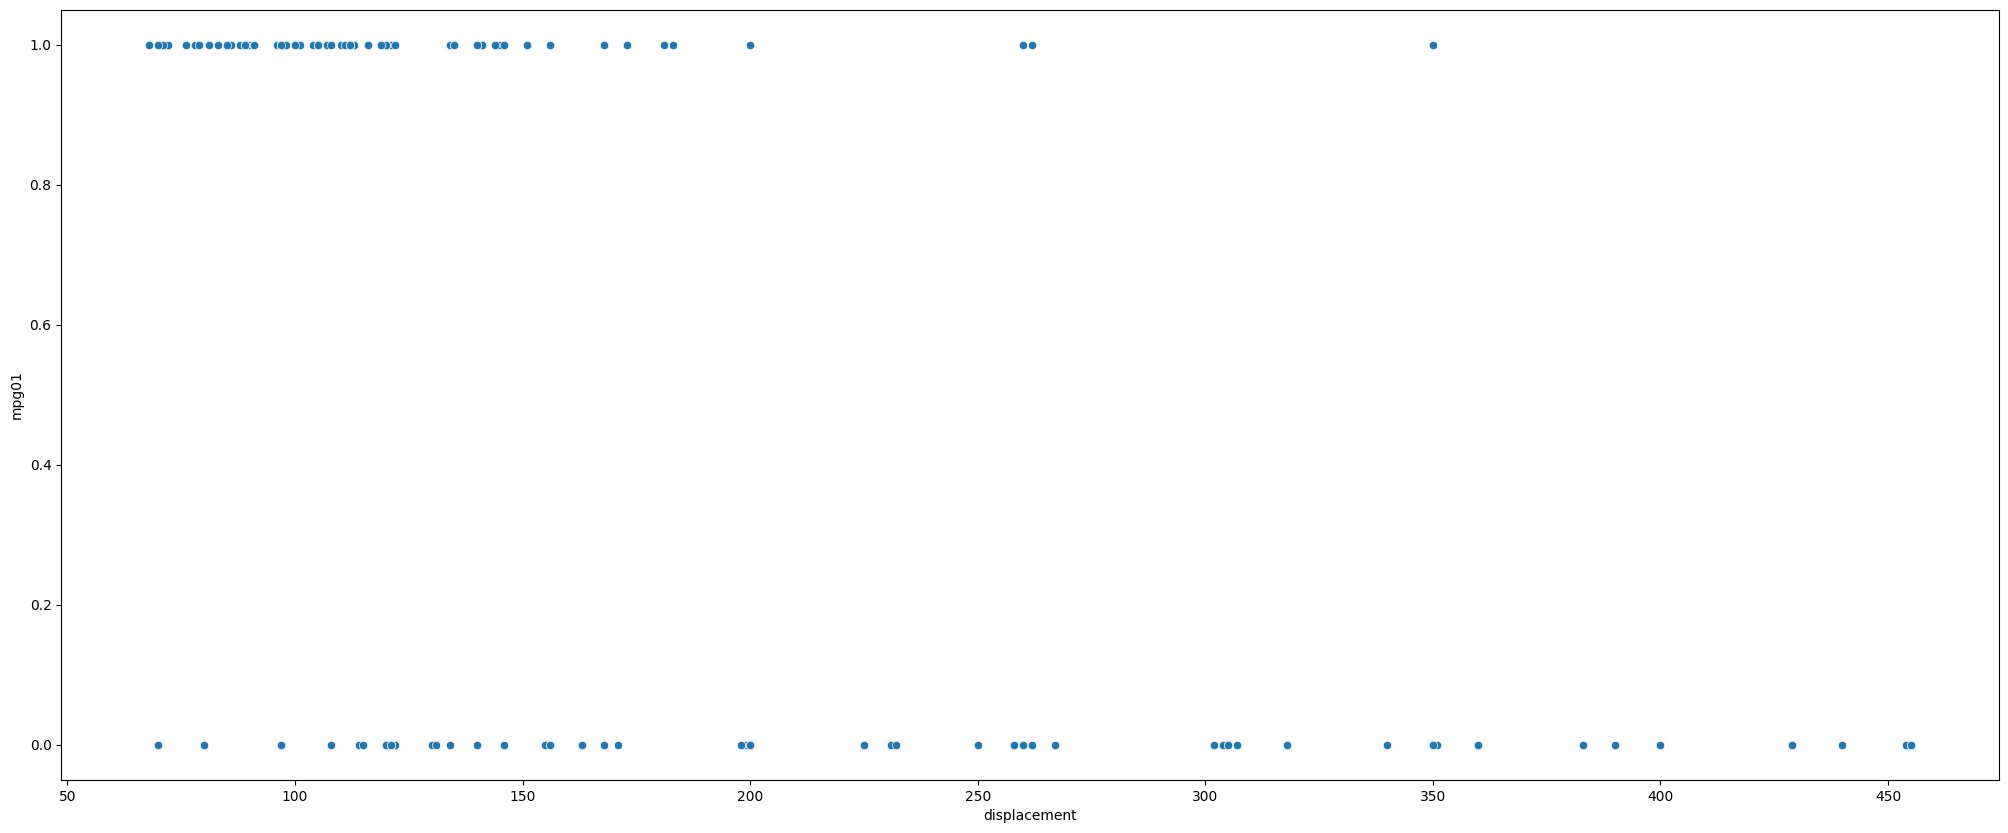

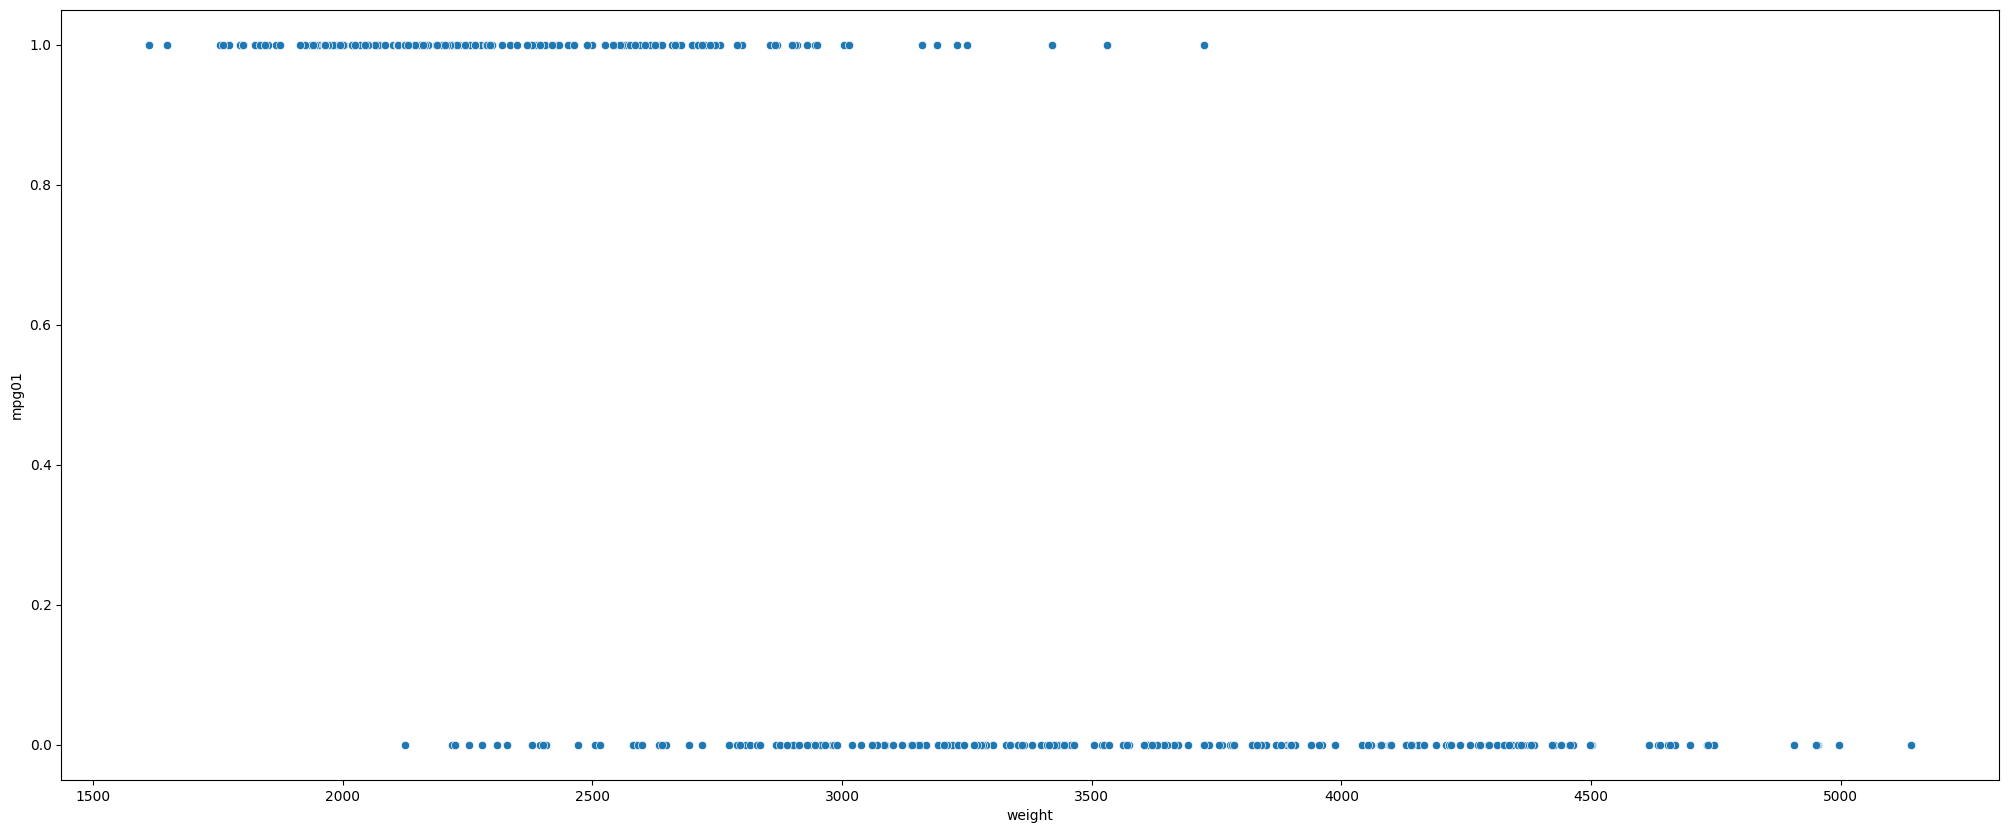

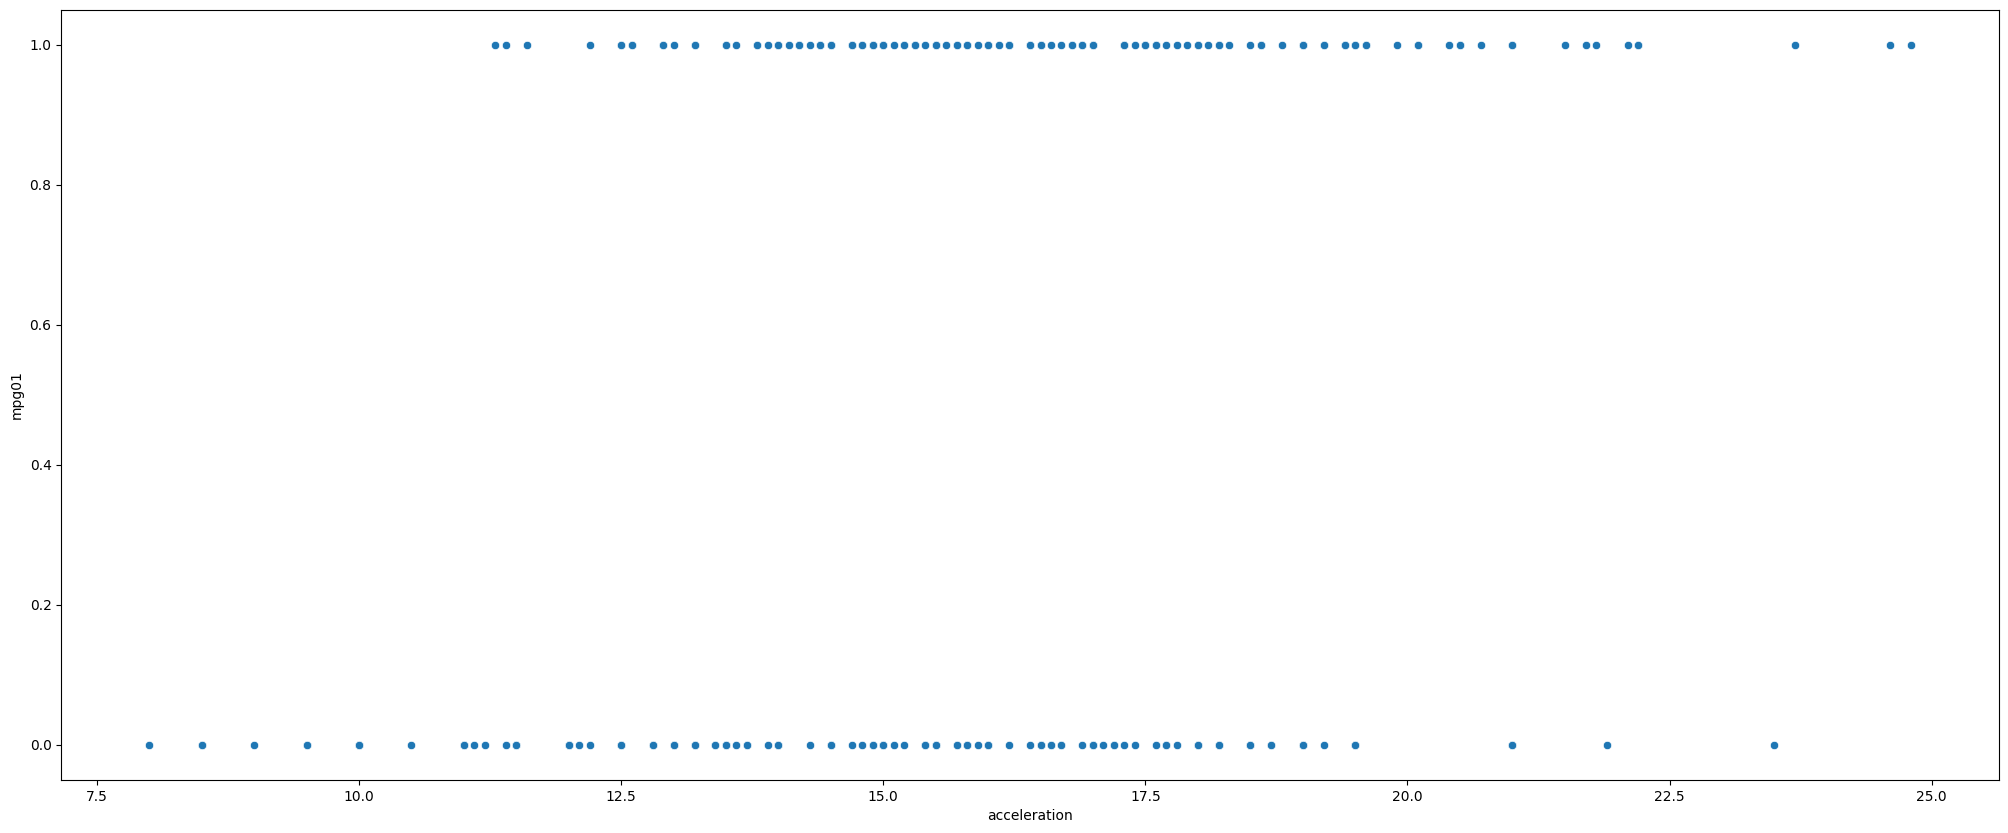

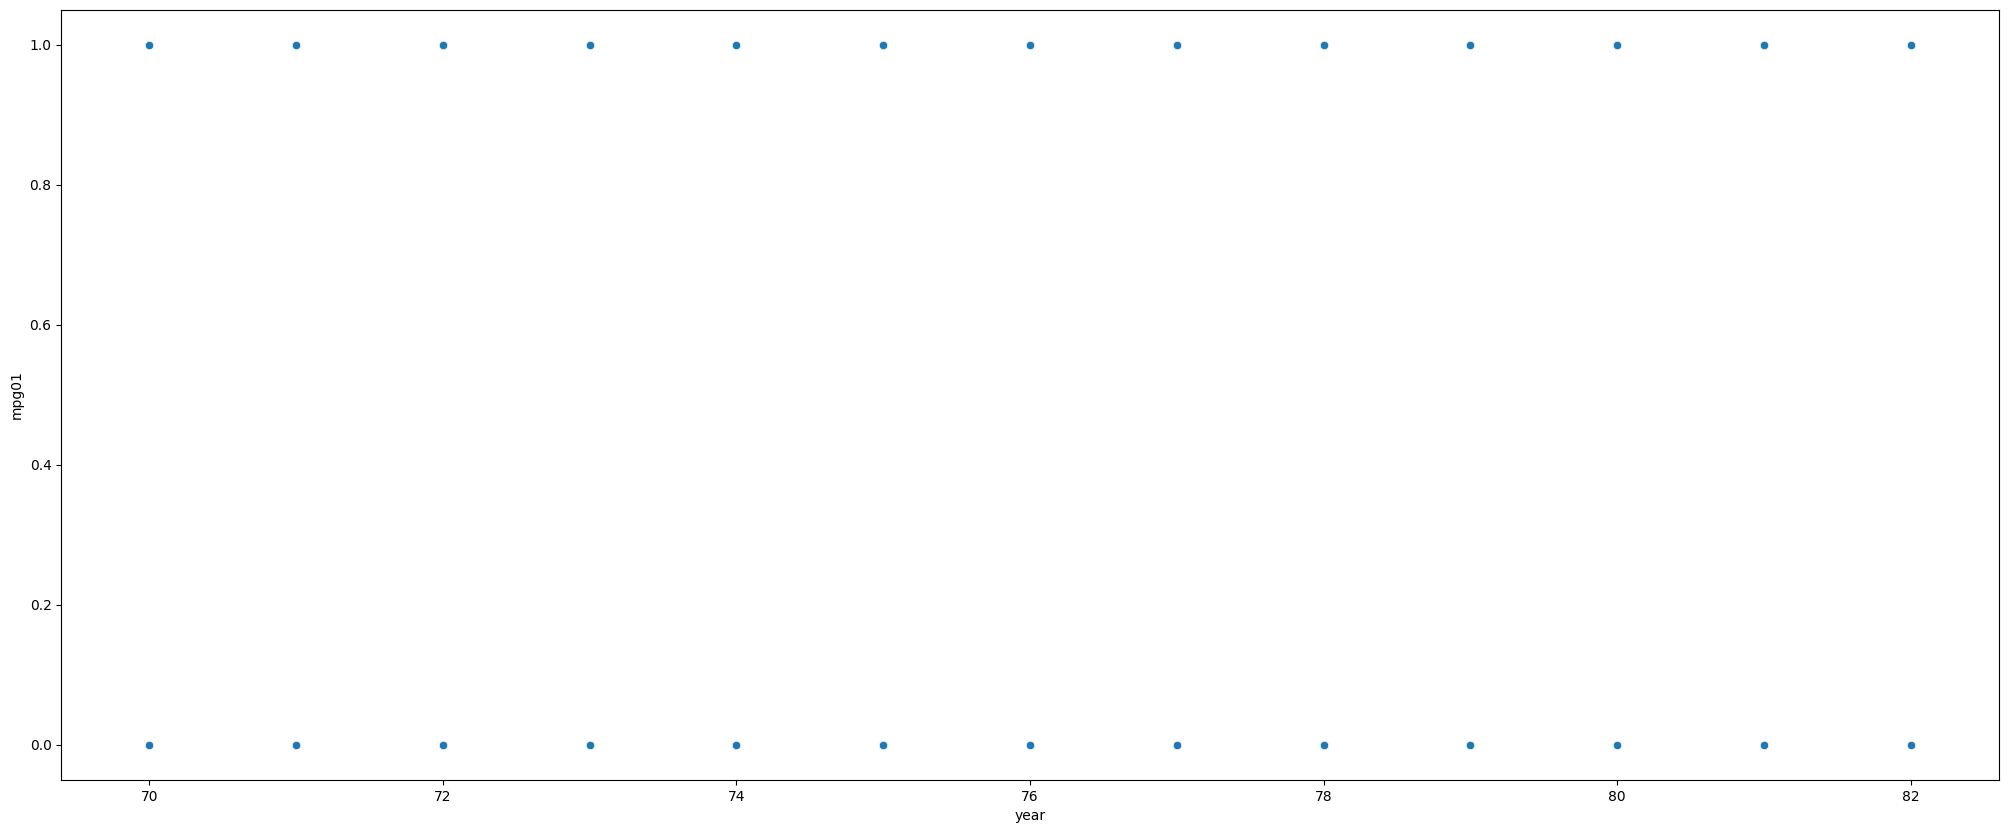

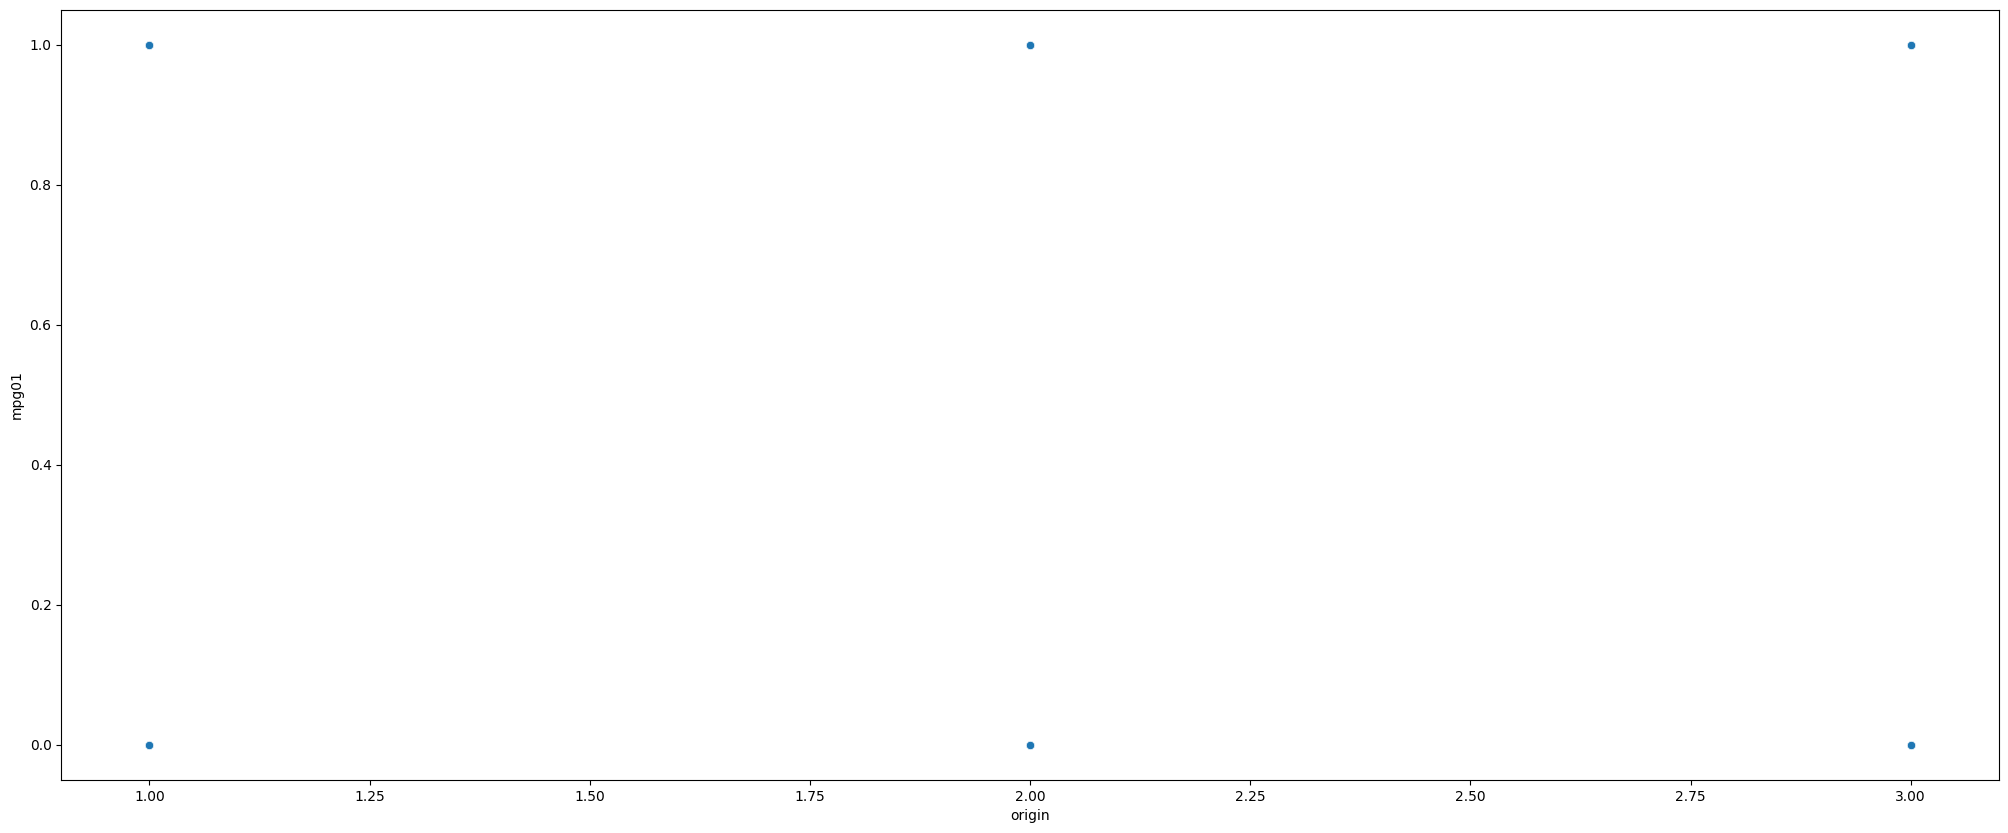

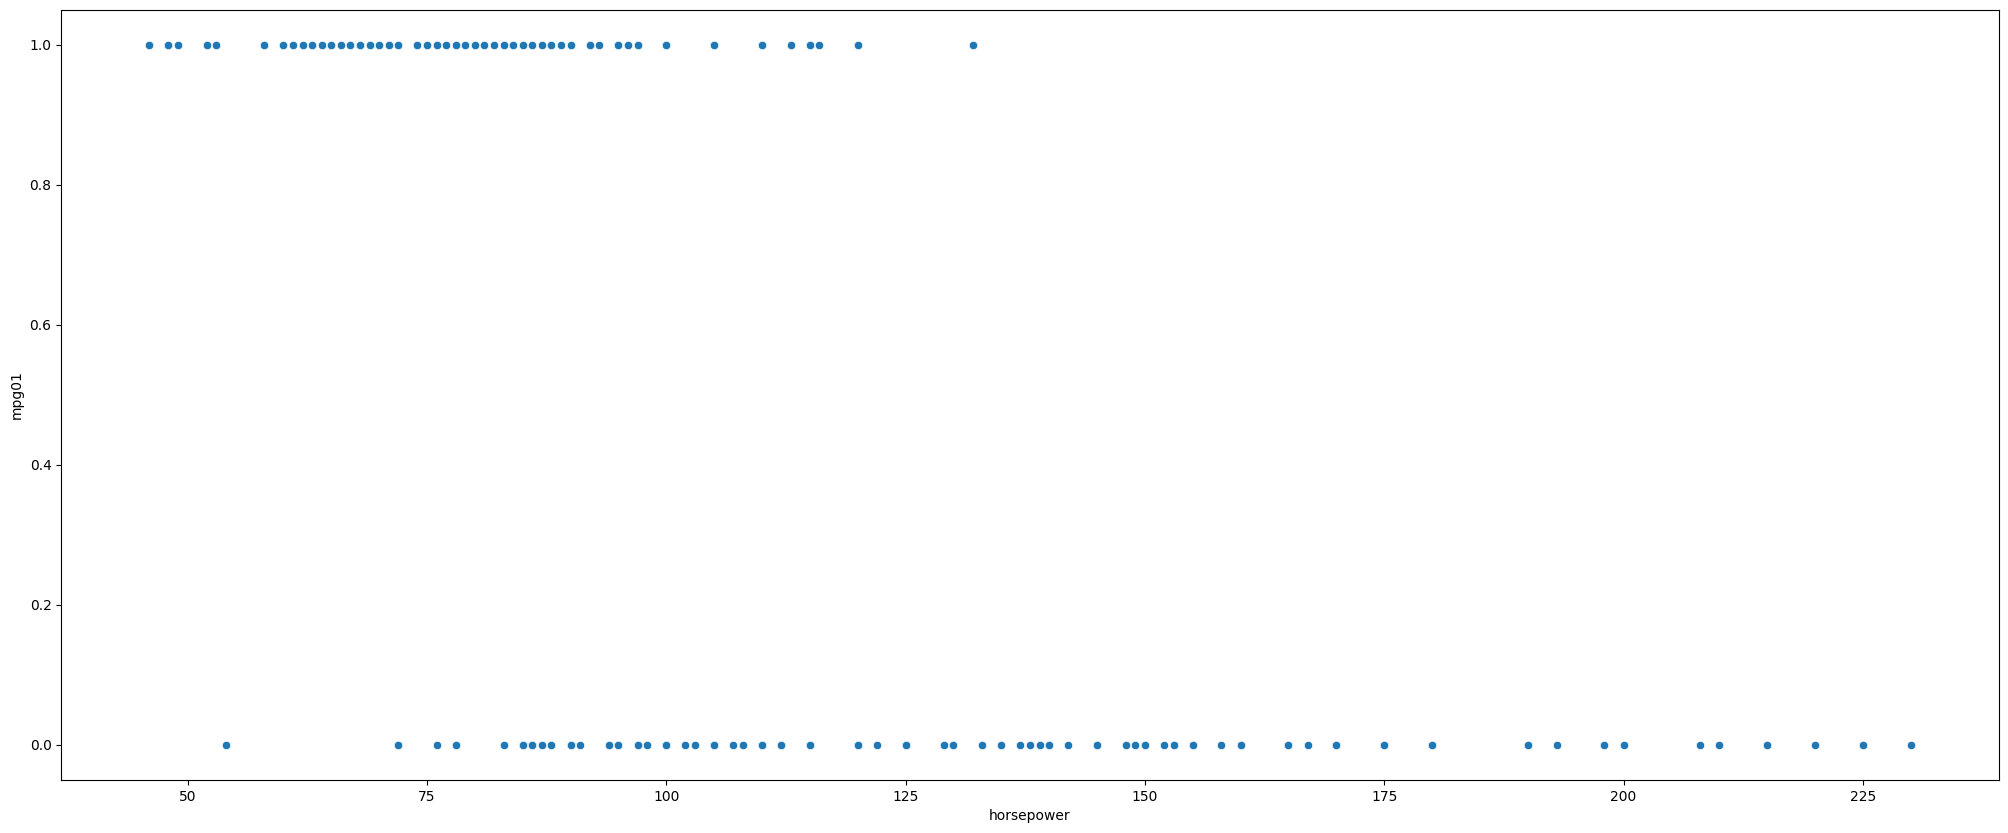

In [11]:
for i in cols:
    # plt.xkcd()
    plt.figure(figsize = (25, 10))
    sns.scatterplot(y = Auto['mpg01'], x = Auto[i])

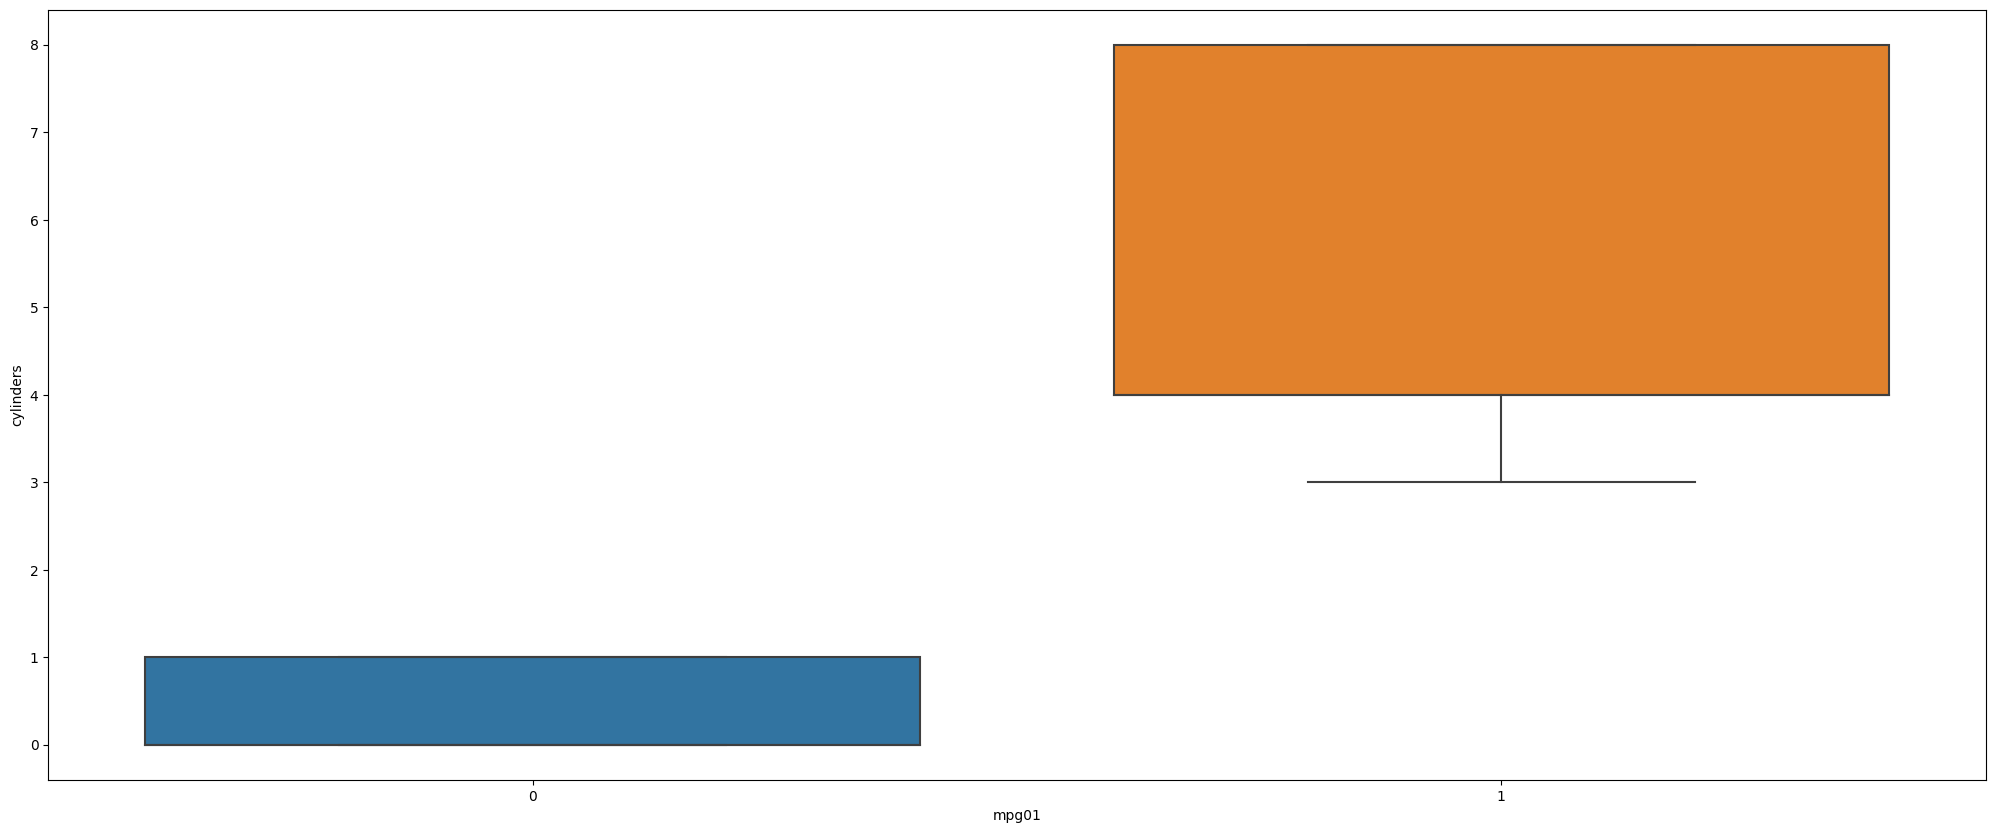

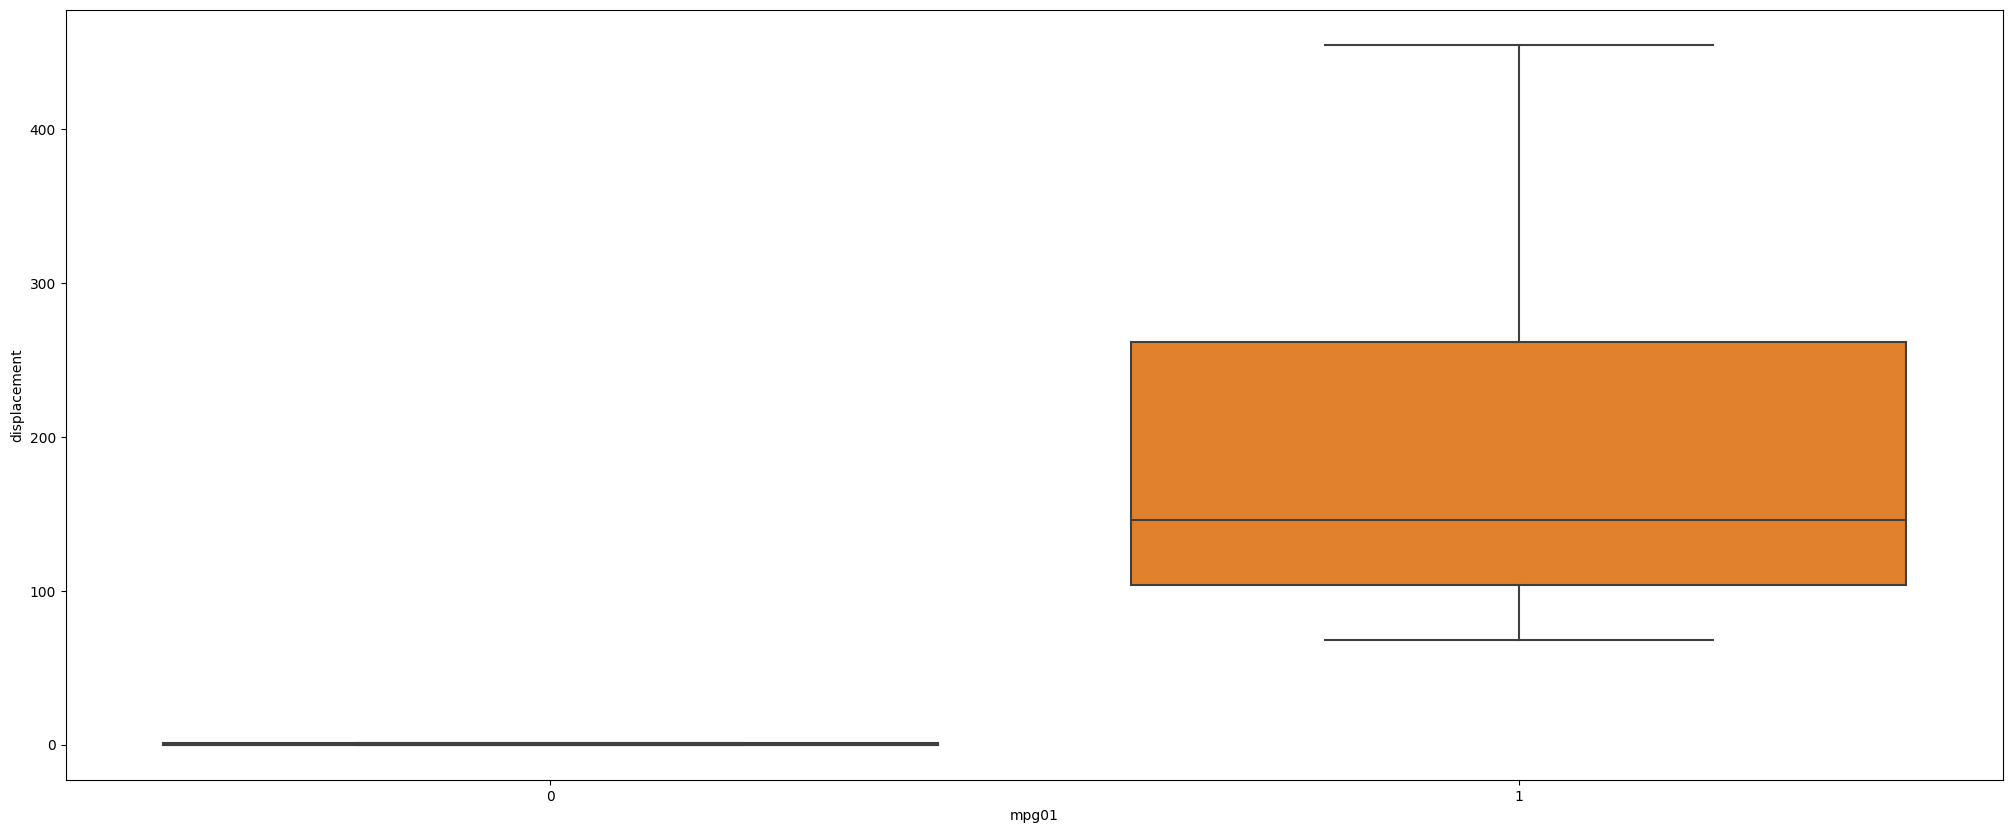

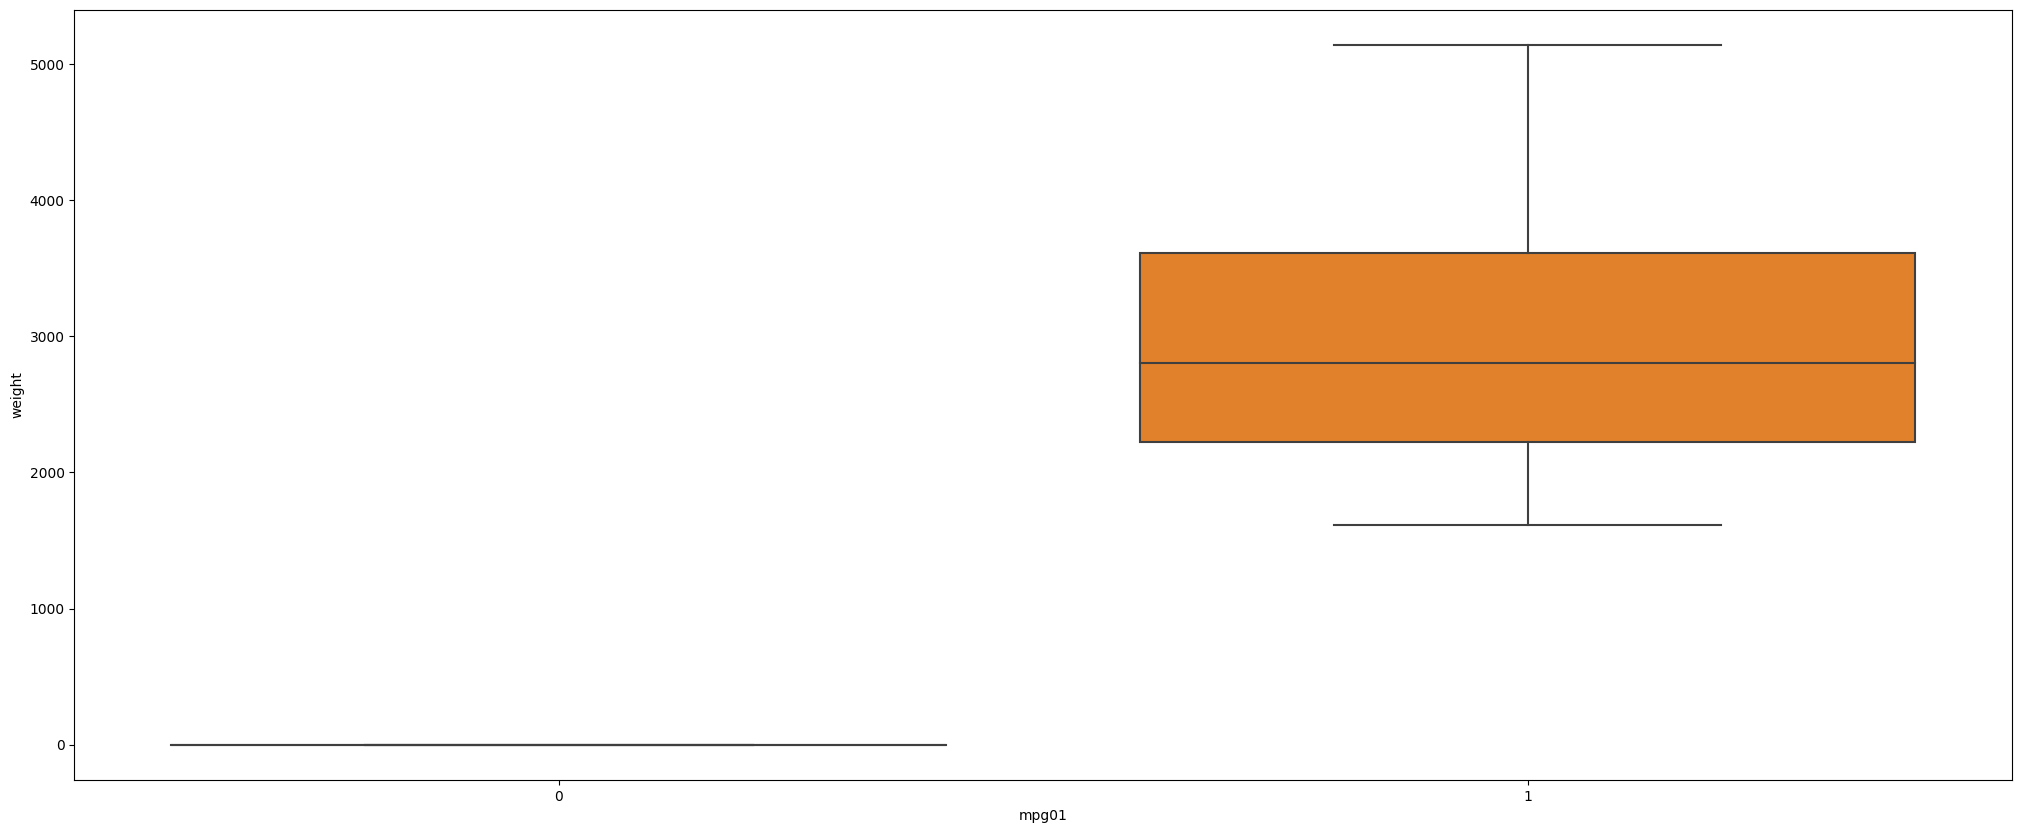

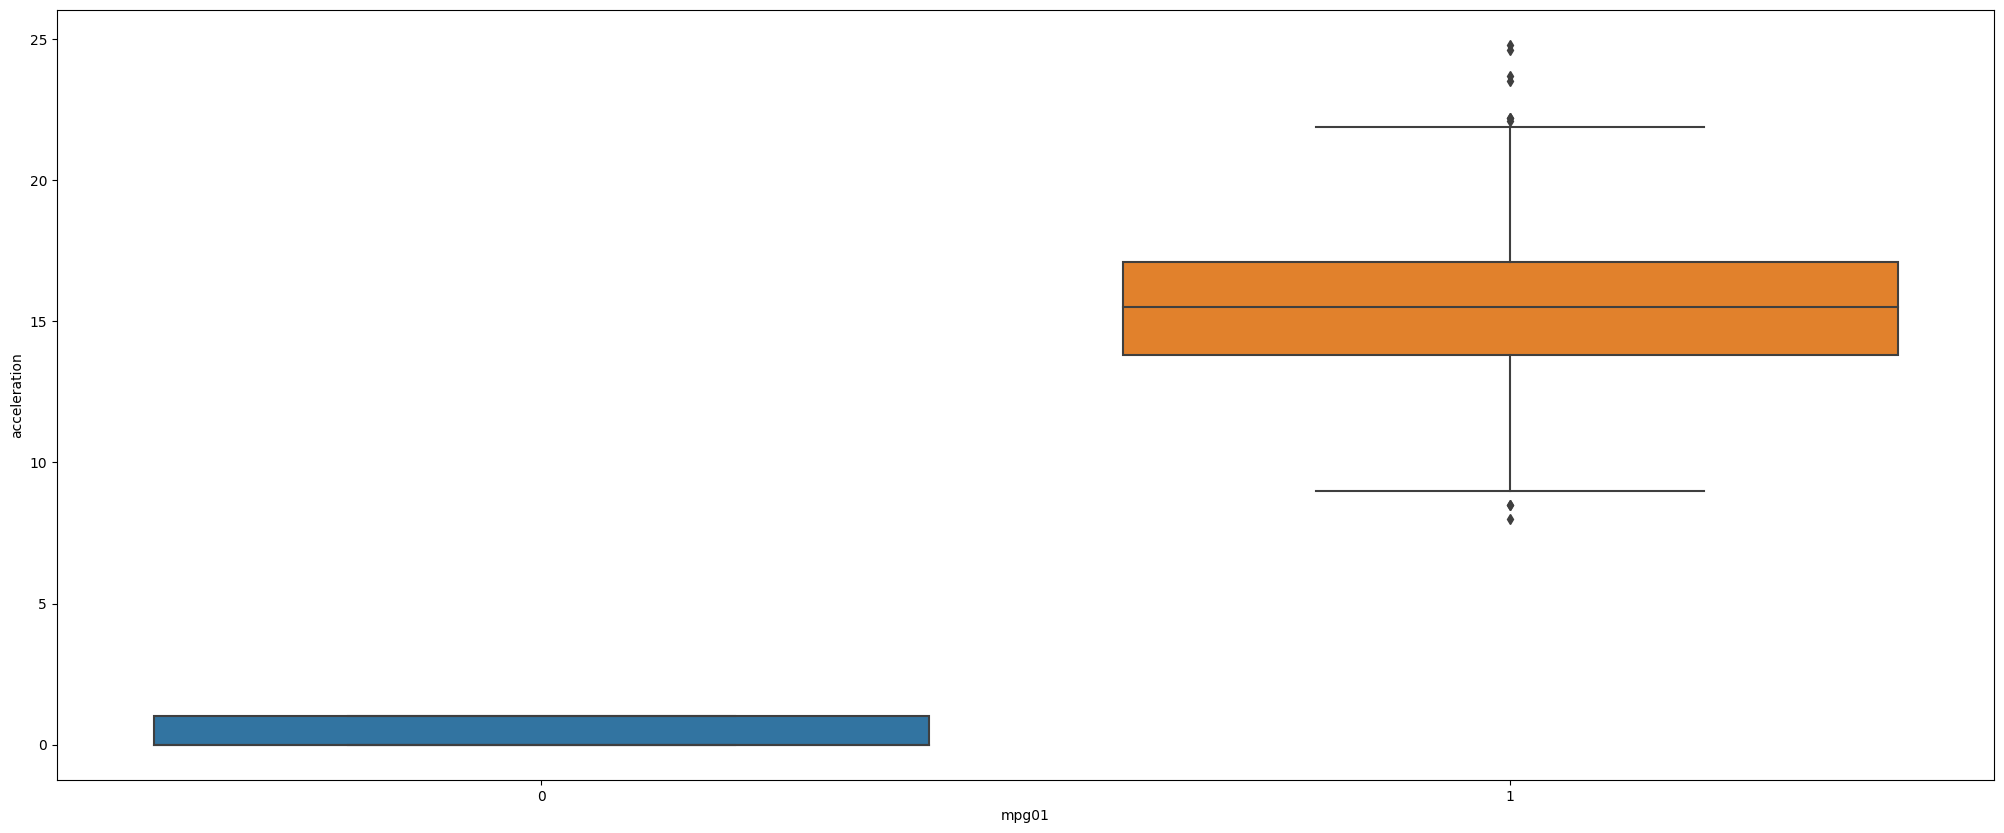

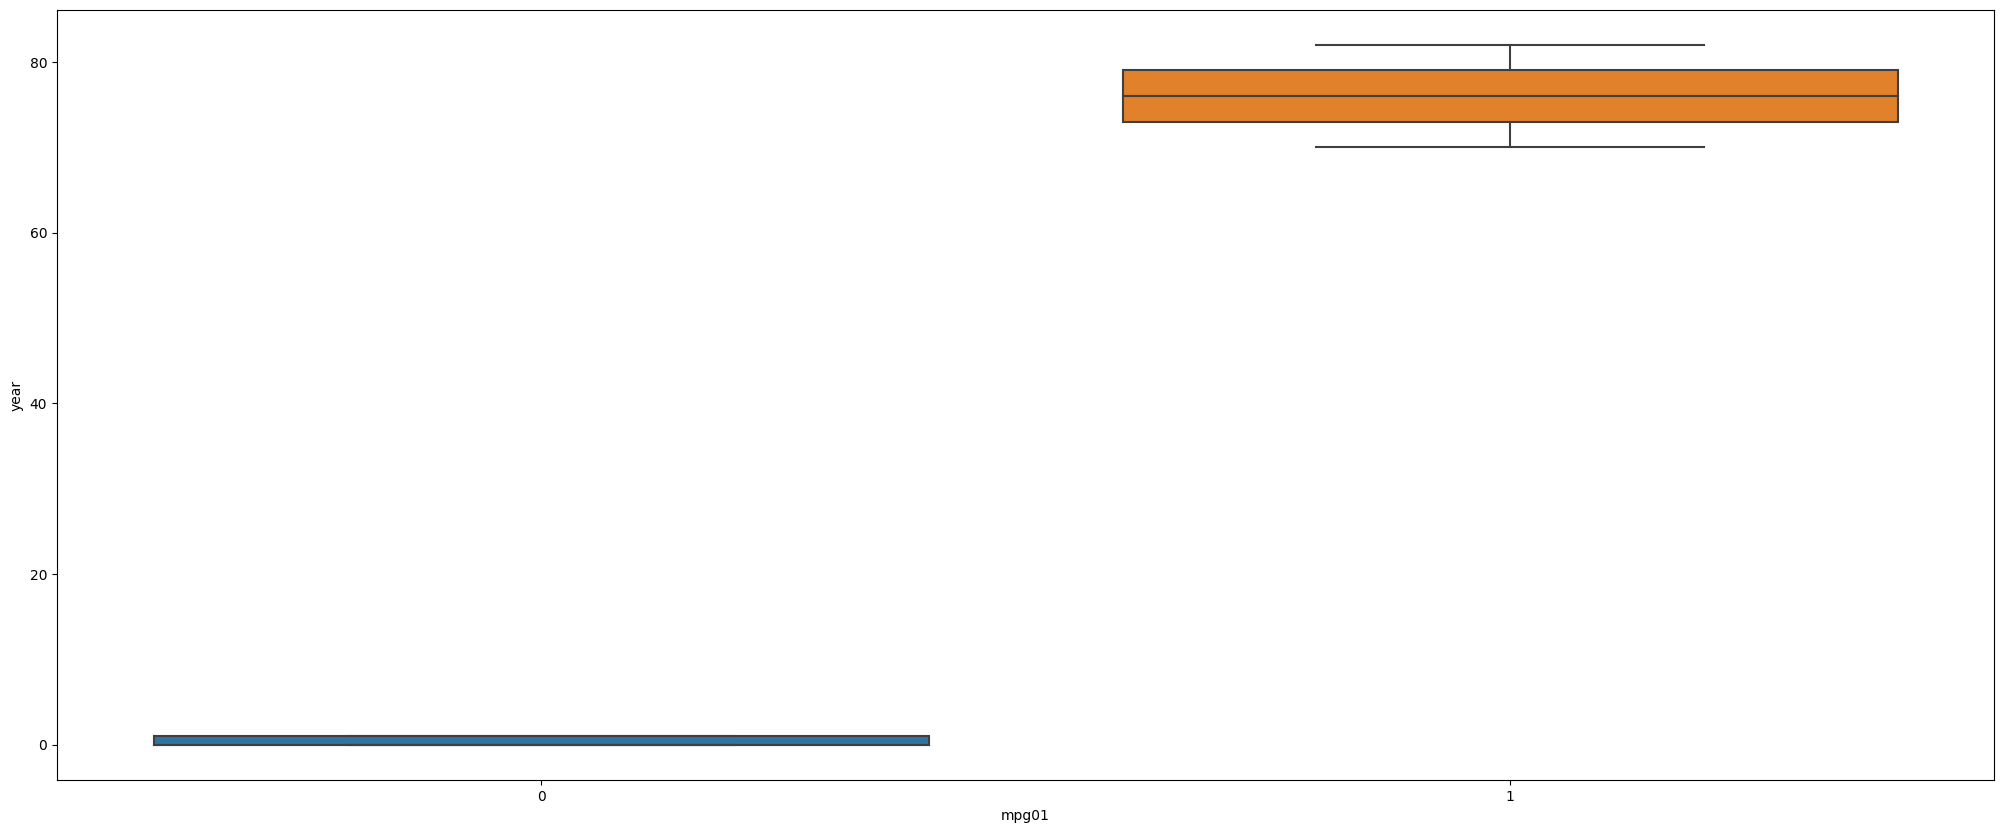

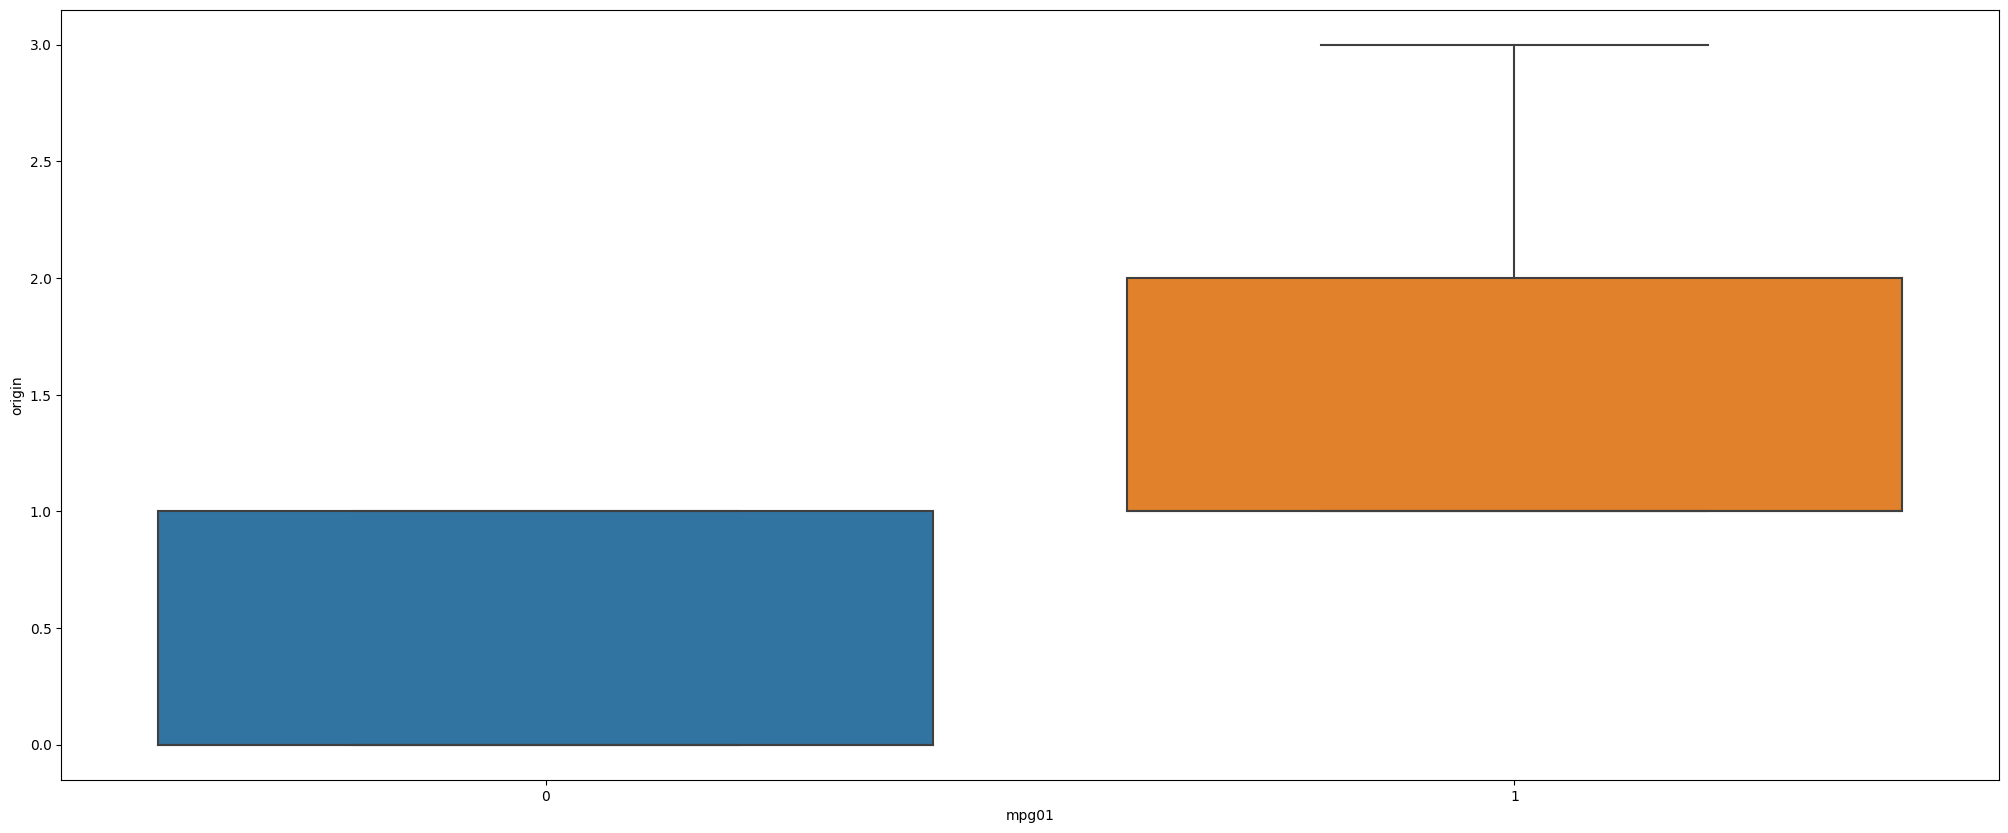

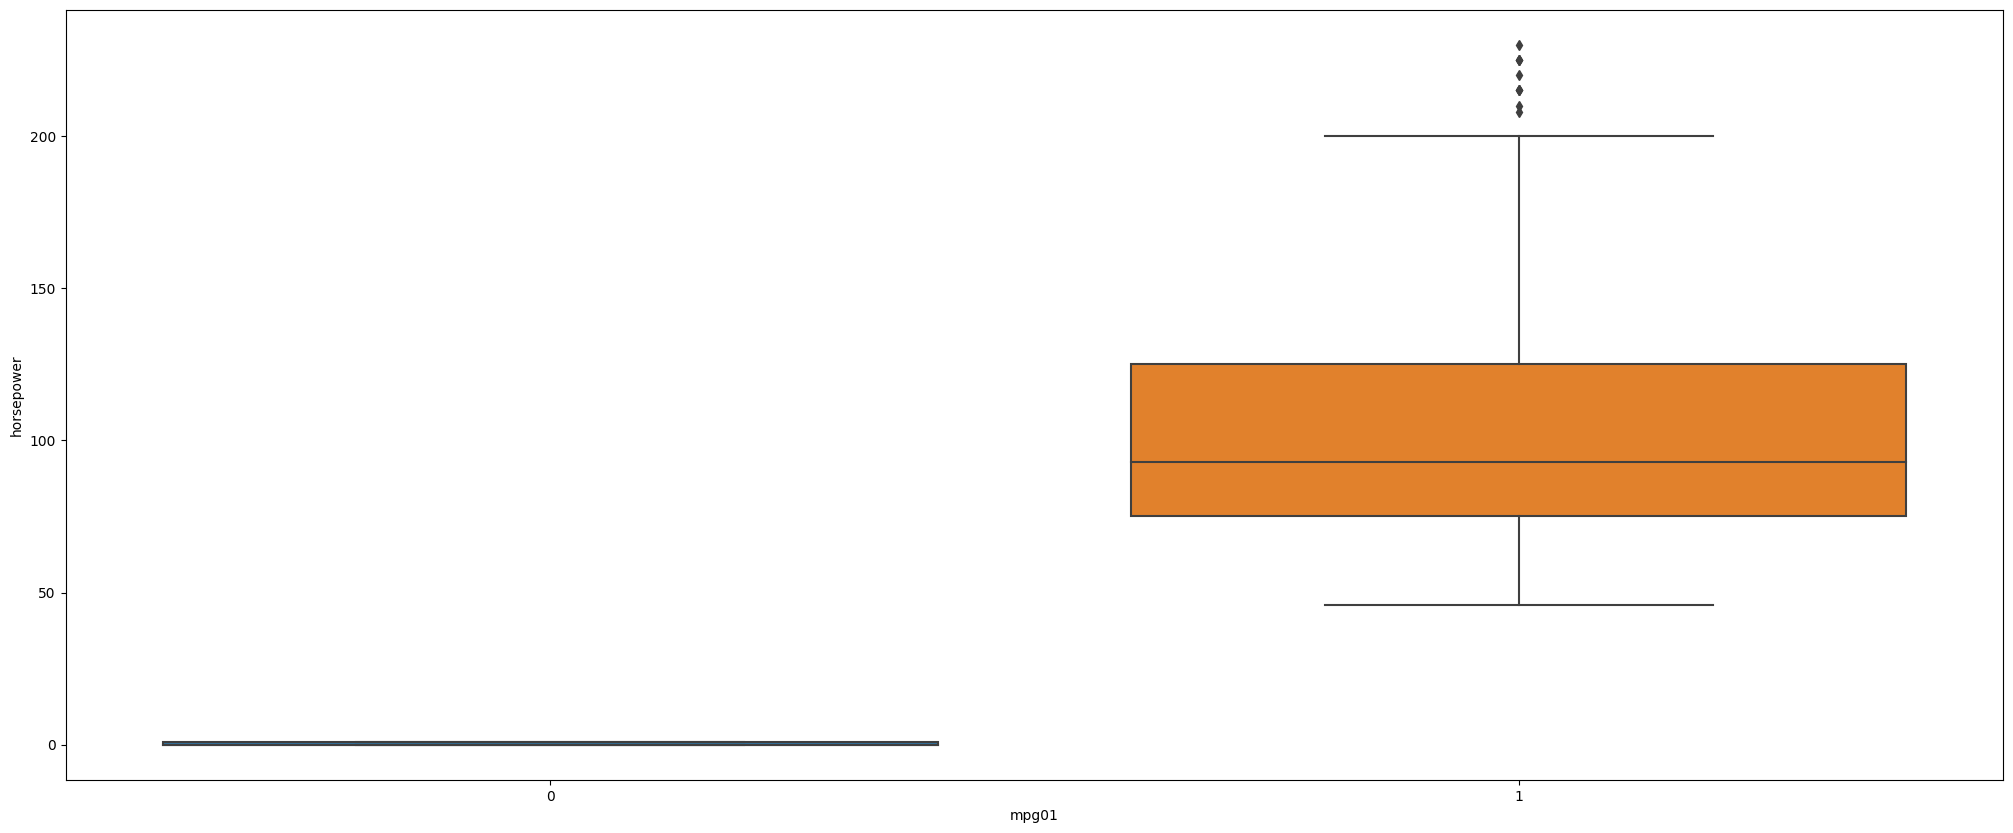

In [12]:
for i in cols:
    # plt.xkcd()
    plt.figure(figsize = (25, 10))
    sns.boxplot(data = [Auto['mpg01'], Auto[i]])
    plt.ylabel(i)
    plt.xlabel('mpg01')

<Figure size 2500x1000 with 0 Axes>

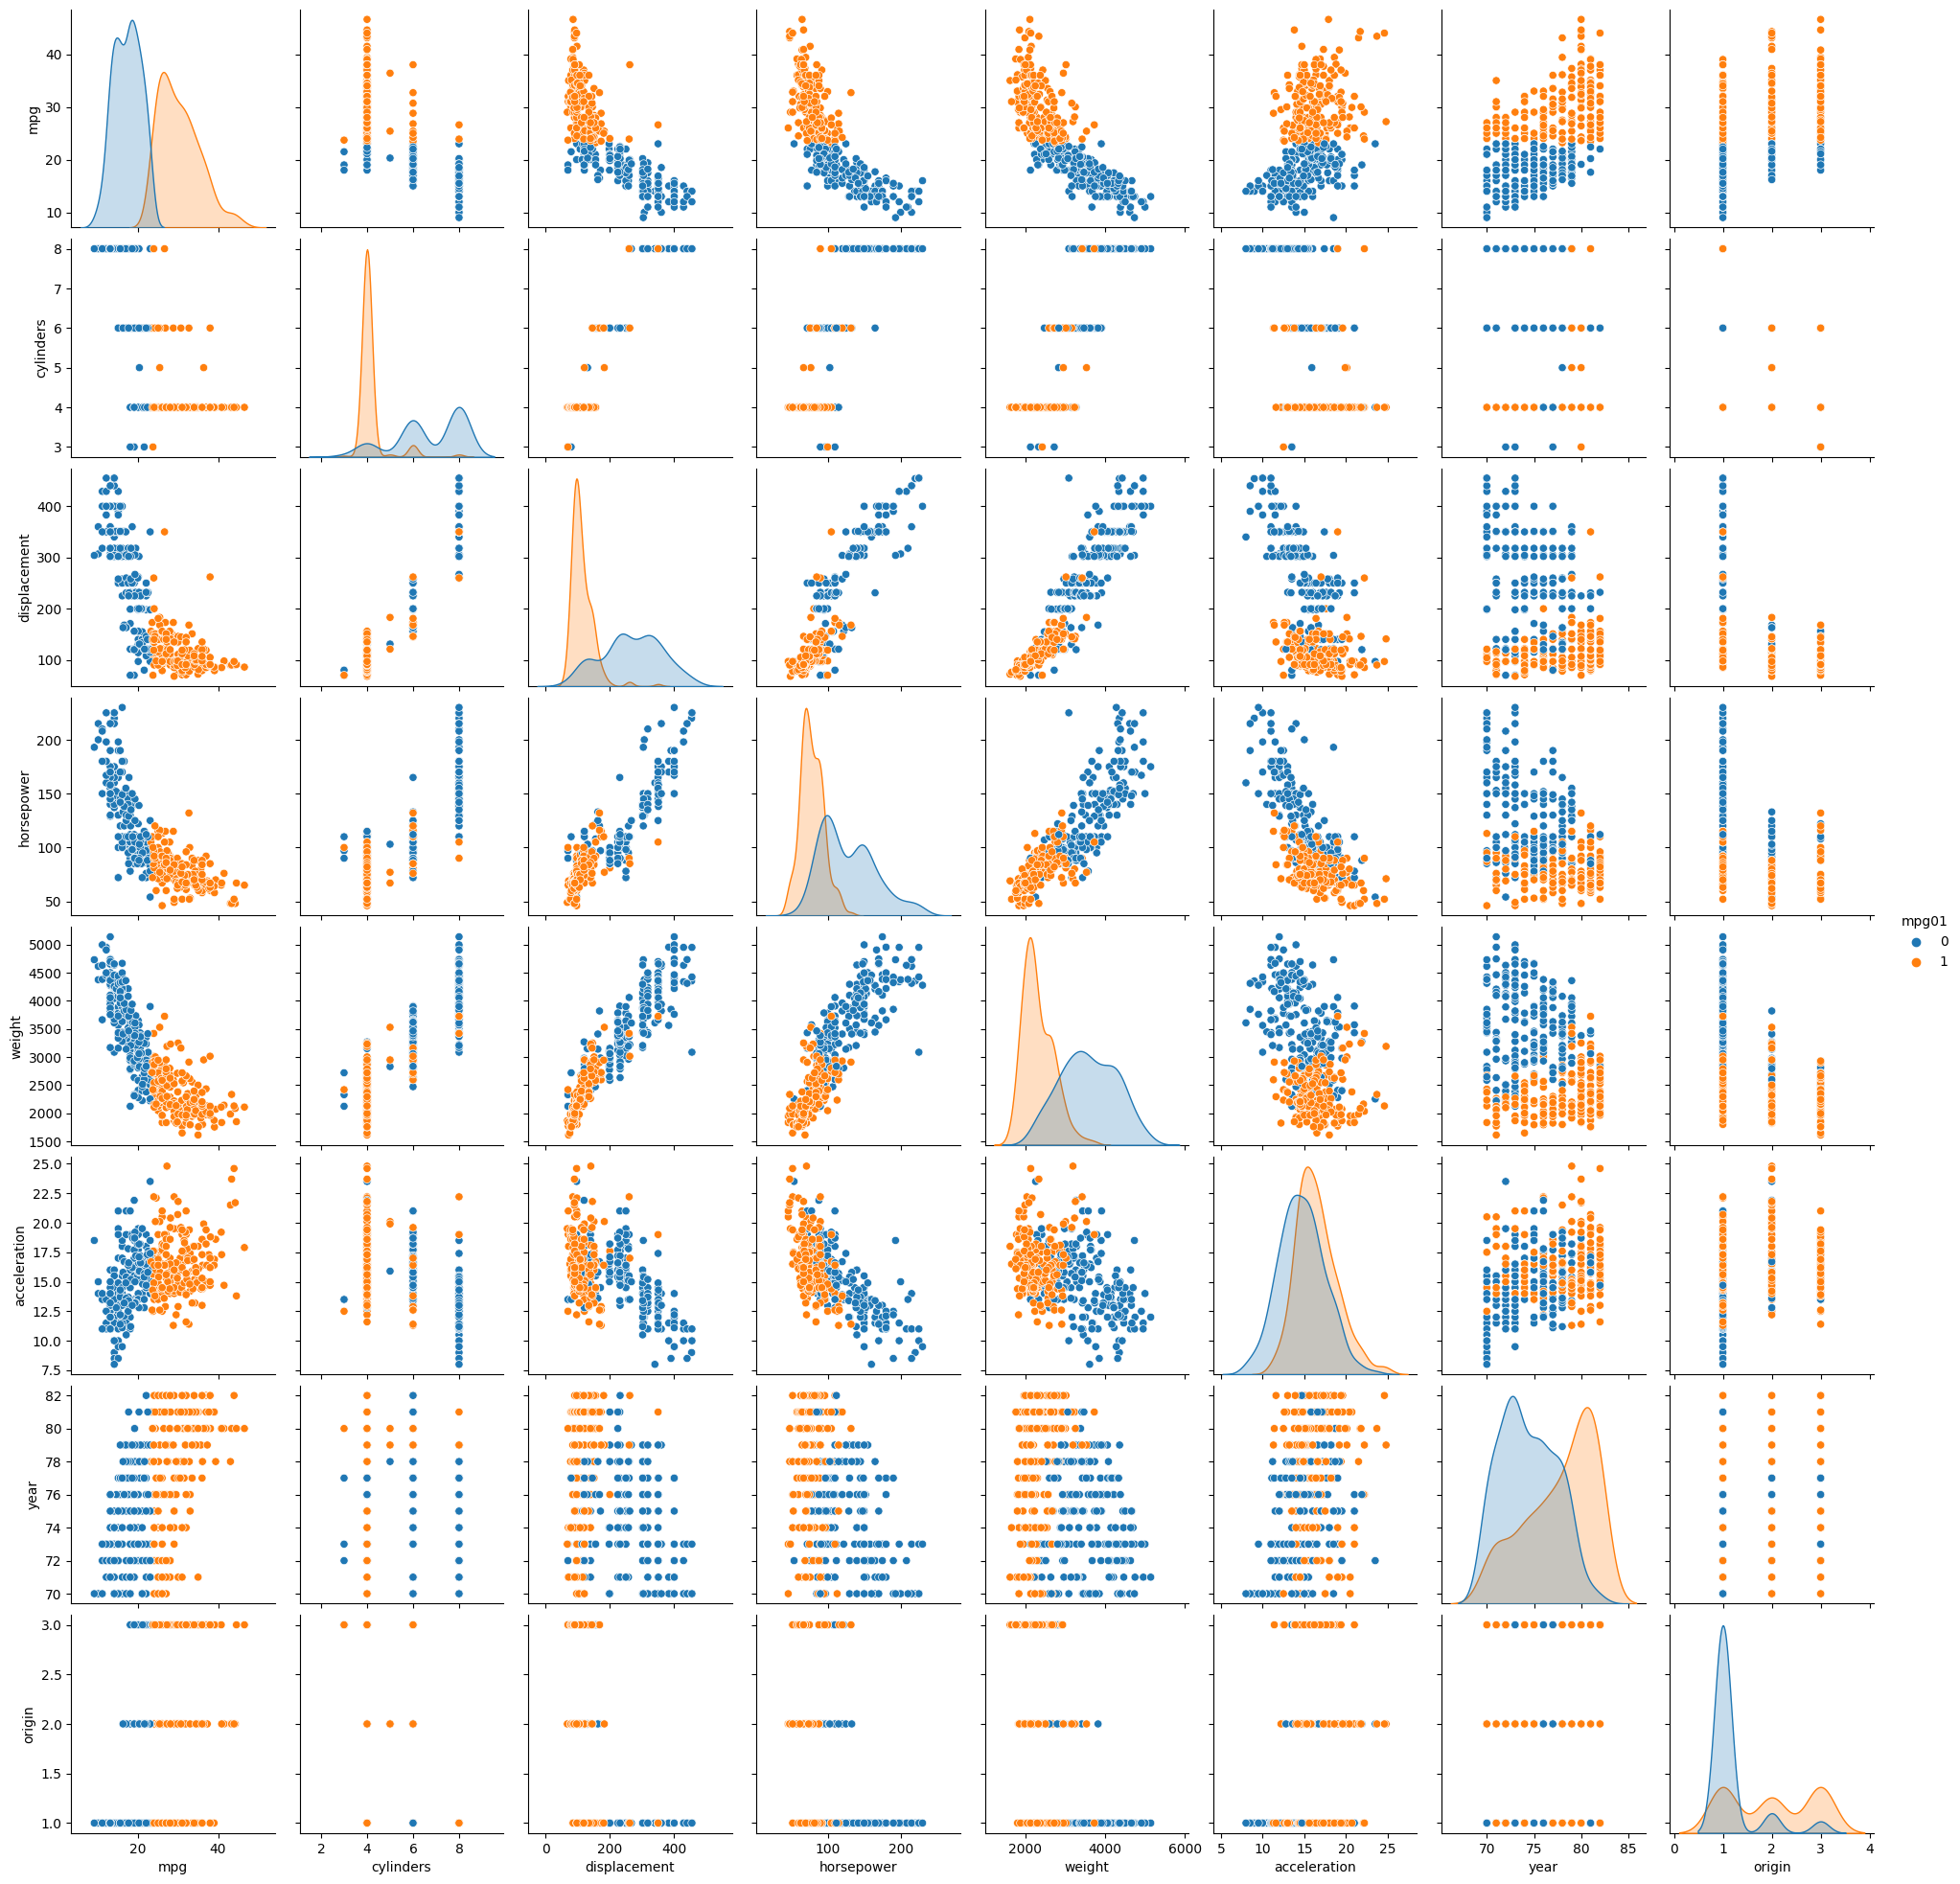

In [13]:
import warnings
warnings.simplefilter('ignore')
# plt.xkcd()
plt.figure(figsize = (25, 10))
sns.pairplot(Auto, hue = 'mpg01')

*There is a clear negative correlation between cylinders, weight, displacement and horsepower. There is a positive
correlation with acceleration.*

**11.c. Splitting data into training and test data**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
Auto.drop(columns=['mpg', 'name'], inplace=True) # deleting name since it does not contribute towards any modelling

In [16]:
Auto.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,0
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,0
4,8,302.0,140,3449,10.5,70,1,0


In [17]:
X = Auto.drop(columns=['mpg01'])
y = Auto['mpg01']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**10.d. Linear Discriminant Analysis**

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [19]:
y_train.dtype

dtype('int64')

In [20]:
ldafit = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto').fit(X_train, y_train)

In [21]:
ldapred = ldafit.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
print(confusion_matrix(y_test, ldapred))

[[50 13]
 [ 2 67]]


In [24]:
print(classification_report(y_test, ldapred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        63
           1       0.84      0.97      0.90        69

    accuracy                           0.89       132
   macro avg       0.90      0.88      0.88       132
weighted avg       0.90      0.89      0.89       132



**11.e. Quadratic Discriminant Analysis**

In [28]:
qdafit = QuadraticDiscriminantAnalysis(reg_param = 0.01).fit(X_train, y_train)

In [29]:
qdapred = qdafit.predict(X_test)

In [30]:
print(confusion_matrix(y_test, qdapred))

[[55  8]
 [ 5 64]]


In [31]:
print(classification_report(y_test, qdapred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        63
           1       0.89      0.93      0.91        69

    accuracy                           0.90       132
   macro avg       0.90      0.90      0.90       132
weighted avg       0.90      0.90      0.90       132



*QDA provides marginal improvement over LDA.*

**11.f. Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression

In [48]:
glmfit = LogisticRegression(solver='liblinear', C = 2.0).fit(X_train, y_train)

In [49]:
glmpred = glmfit.predict(X_test)

In [50]:
print(confusion_matrix(y_test, glmpred))

[[52 11]
 [ 7 62]]


In [51]:
print(classification_report(y_test, glmpred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        63
           1       0.85      0.90      0.87        69

    accuracy                           0.86       132
   macro avg       0.87      0.86      0.86       132
weighted avg       0.86      0.86      0.86       132



*Logistic Regression performs the same as QDA*

**11.g. K-Nearest Neighbours**

*Since different features are measured differently, we will need to standardise them before modelling. However, since the dataset has already been manipulated quite a bit, I will need to re-import the data and redo some of the manipulations.*

In [52]:
# import Weekly data
url = "../../Data/Auto.csv"
Auto = pd.read_csv(url)

In [39]:
# Auto = Auto.drop(Auto.index[[32, 126, 330, 336, 354]])
# Auto['hp'] = Auto['horsepower'].astype(float) # horsepower imports in my dataframe as string. So I convert it to float
# Auto.drop(columns = 'horsepower', inplace = True)
# Auto.reset_index(drop=True, inplace = True)

In [53]:
mpg_median = Auto['mpg'].median()
mpg_median

23.0

In [54]:
# create binary variable 'mpg01', 1 if > 'mpg_median', else 0
Auto['mpg01'] = np.where(Auto['mpg'] > mpg_median, 1, 0)

In [55]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    int64  
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
 9   mpg01         397 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 31.1+ KB


In [56]:
# drop 'mpg', 'name'
Auto = Auto.drop(['mpg', 'name'], axis = 1)

In [57]:
# corece 'origin', 'cylinders' as object
Auto['origin'] = Auto['origin'].astype('object')
Auto['cylinders'] = Auto['cylinders'].astype('object')

In [58]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     397 non-null    object 
 1   displacement  397 non-null    float64
 2   horsepower    397 non-null    int64  
 3   weight        397 non-null    int64  
 4   acceleration  397 non-null    float64
 5   year          397 non-null    int64  
 6   origin        397 non-null    object 
 7   mpg01         397 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 24.9+ KB


In [59]:
Auto = pd.get_dummies(Auto, columns=['cylinders', 'origin'], drop_first=True)

In [60]:
Auto

,displacement,horsepower,weight,acceleration,year,mpg01,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_2,origin_3
0,307.0,130,3504,12.0,70,0,0,0,0,1,0,0
1,350.0,165,3693,11.5,70,0,0,0,0,1,0,0
2,318.0,150,3436,11.0,70,0,0,0,0,1,0,0
3,304.0,150,3433,12.0,70,0,0,0,0,1,0,0
4,302.0,140,3449,10.5,70,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
392,140.0,86,2790,15.6,82,1,1,0,0,0,0,0
393,97.0,52,2130,24.6,82,1,1,0,0,0,1,0
394,135.0,84,2295,11.6,82,1,1,0,0,0,0,0
395,120.0,79,2625,18.6,82,1,1,0,0,0,0,0


In [61]:
Auto.shape

(397, 12)

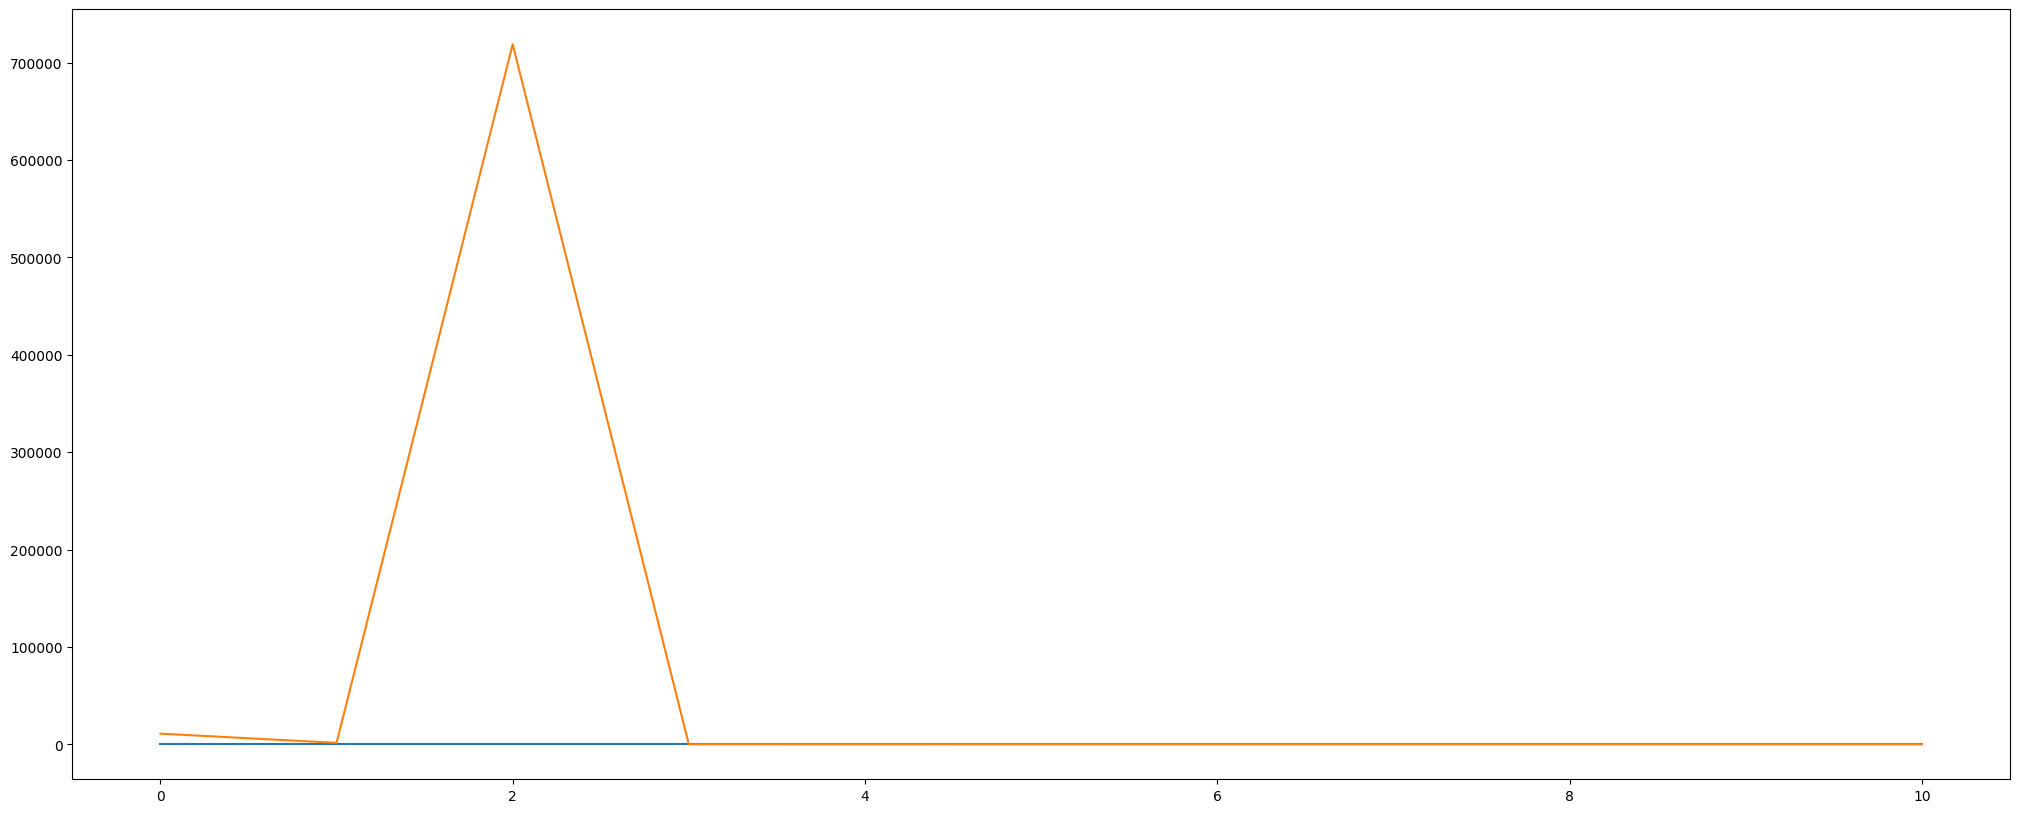

In [62]:
pf = pd.DataFrame()
for i in Auto.columns[:-1]:
    pf = pf.append([Auto[i].var()])


# plt.xkcd()
plt.figure(figsize = (25, 10))
plt.plot(pf.reset_index())

In [63]:
# create X, y
X = Auto.drop('mpg01', axis = 1)
y = Auto['mpg01']

*Whoa! We need to standardise the variables!*

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
import warnings
warnings.simplefilter('ignore')
scaler.fit(X)

StandardScaler()

In [67]:
scaled_features = scaler.transform(X)

In [68]:
Auto_scaled = pd.DataFrame(scaled_features, columns = X.columns)
Auto_scaled.head()

,displacement,horsepower,weight,acceleration,year,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_2,origin_3
0,1.088435,0.673562,0.630274,-1.294604,-1.626699,-1.022933,-0.087259,-0.518045,1.689488,-0.462674,-0.498425
1,1.500913,1.587184,0.853457,-1.476652,-1.626699,-1.022933,-0.087259,-0.518045,1.689488,-0.462674,-0.498425
2,1.193953,1.195632,0.549975,-1.658700,-1.626699,-1.022933,-0.087259,-0.518045,1.689488,-0.462674,-0.498425
3,1.059658,1.195632,0.546432,-1.294604,-1.626699,-1.022933,-0.087259,-0.518045,1.689488,-0.462674,-0.498425
4,1.040473,0.934597,0.565326,-1.840747,-1.626699,-1.022933,-0.087259,-0.518045,1.689488,-0.462674,-0.498425


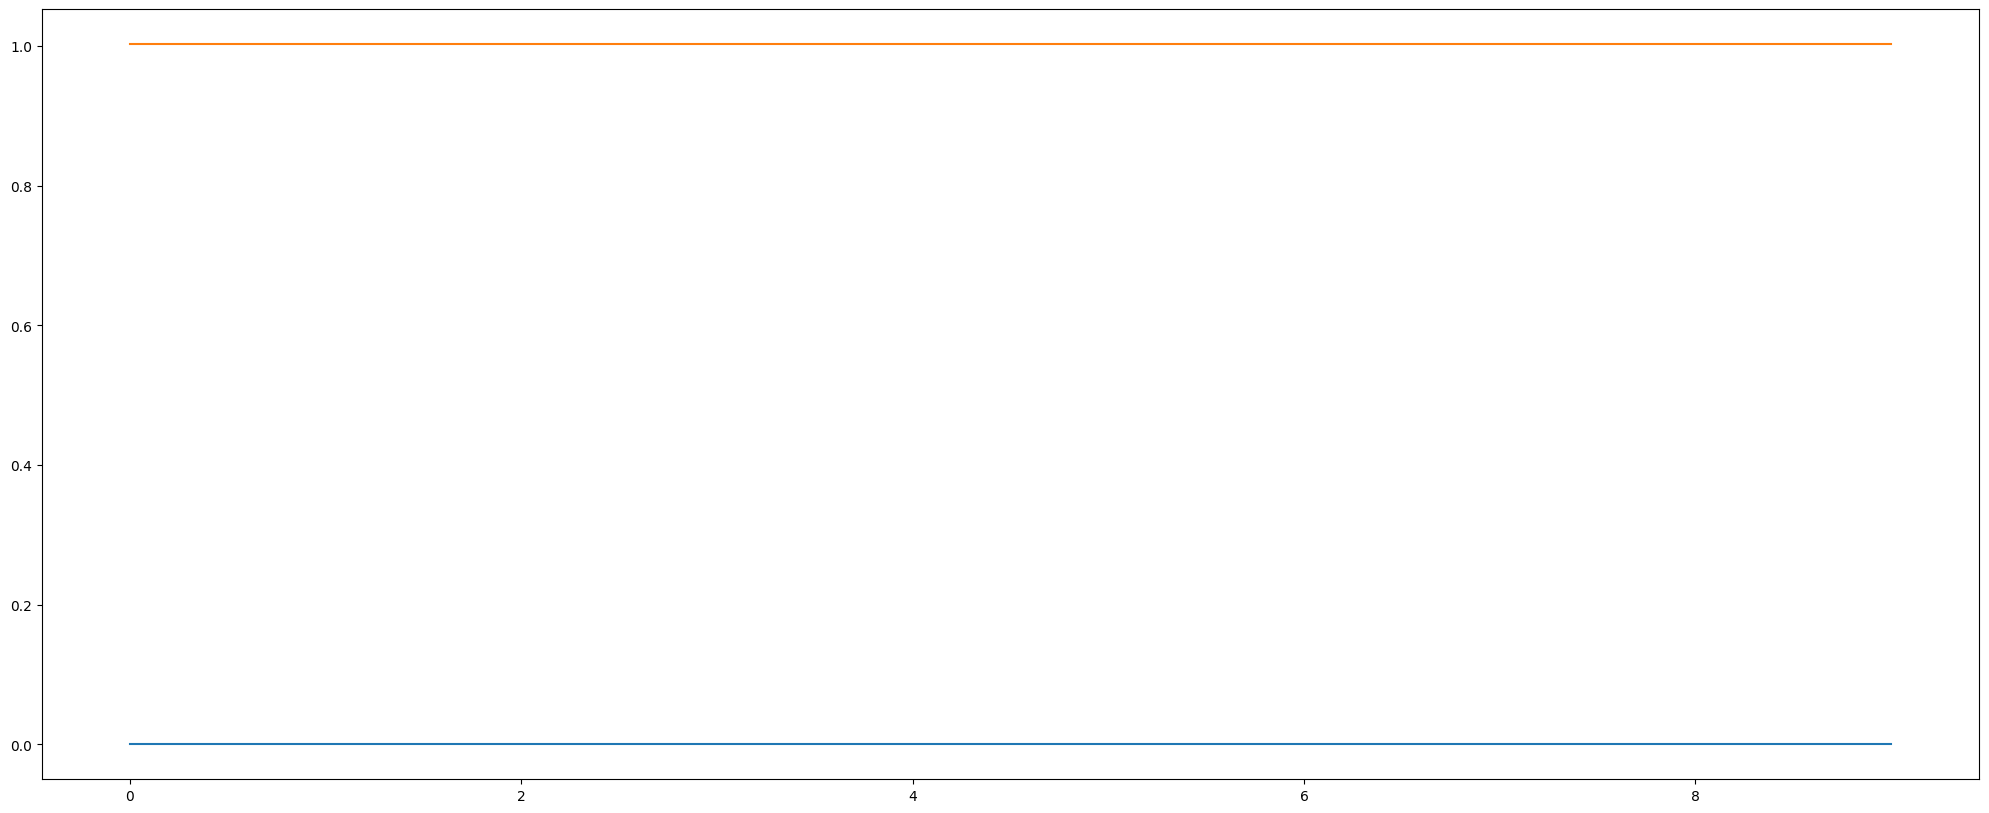

In [69]:
pf = pd.DataFrame()
for i in Auto_scaled.columns[:-1]:
    pf = pf.append([Auto_scaled[i].var()])


# plt.xkcd()
plt.figure(figsize = (25, 10))
plt.plot(pf.reset_index())

In [70]:
# split scaled dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(Auto_scaled, y, test_size=0.33, random_state=42)

*Looks great! Now, I can proceed to the modelling phase.*

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

In [73]:
knnpred = knn.predict(X_test)

In [74]:
print(confusion_matrix(y_test, knnpred))

[[55  8]
 [ 6 63]]


In [75]:
print(classification_report(y_test, knnpred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        63
           1       0.89      0.91      0.90        69

    accuracy                           0.89       132
   macro avg       0.89      0.89      0.89       132
weighted avg       0.89      0.89      0.89       132



In [76]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

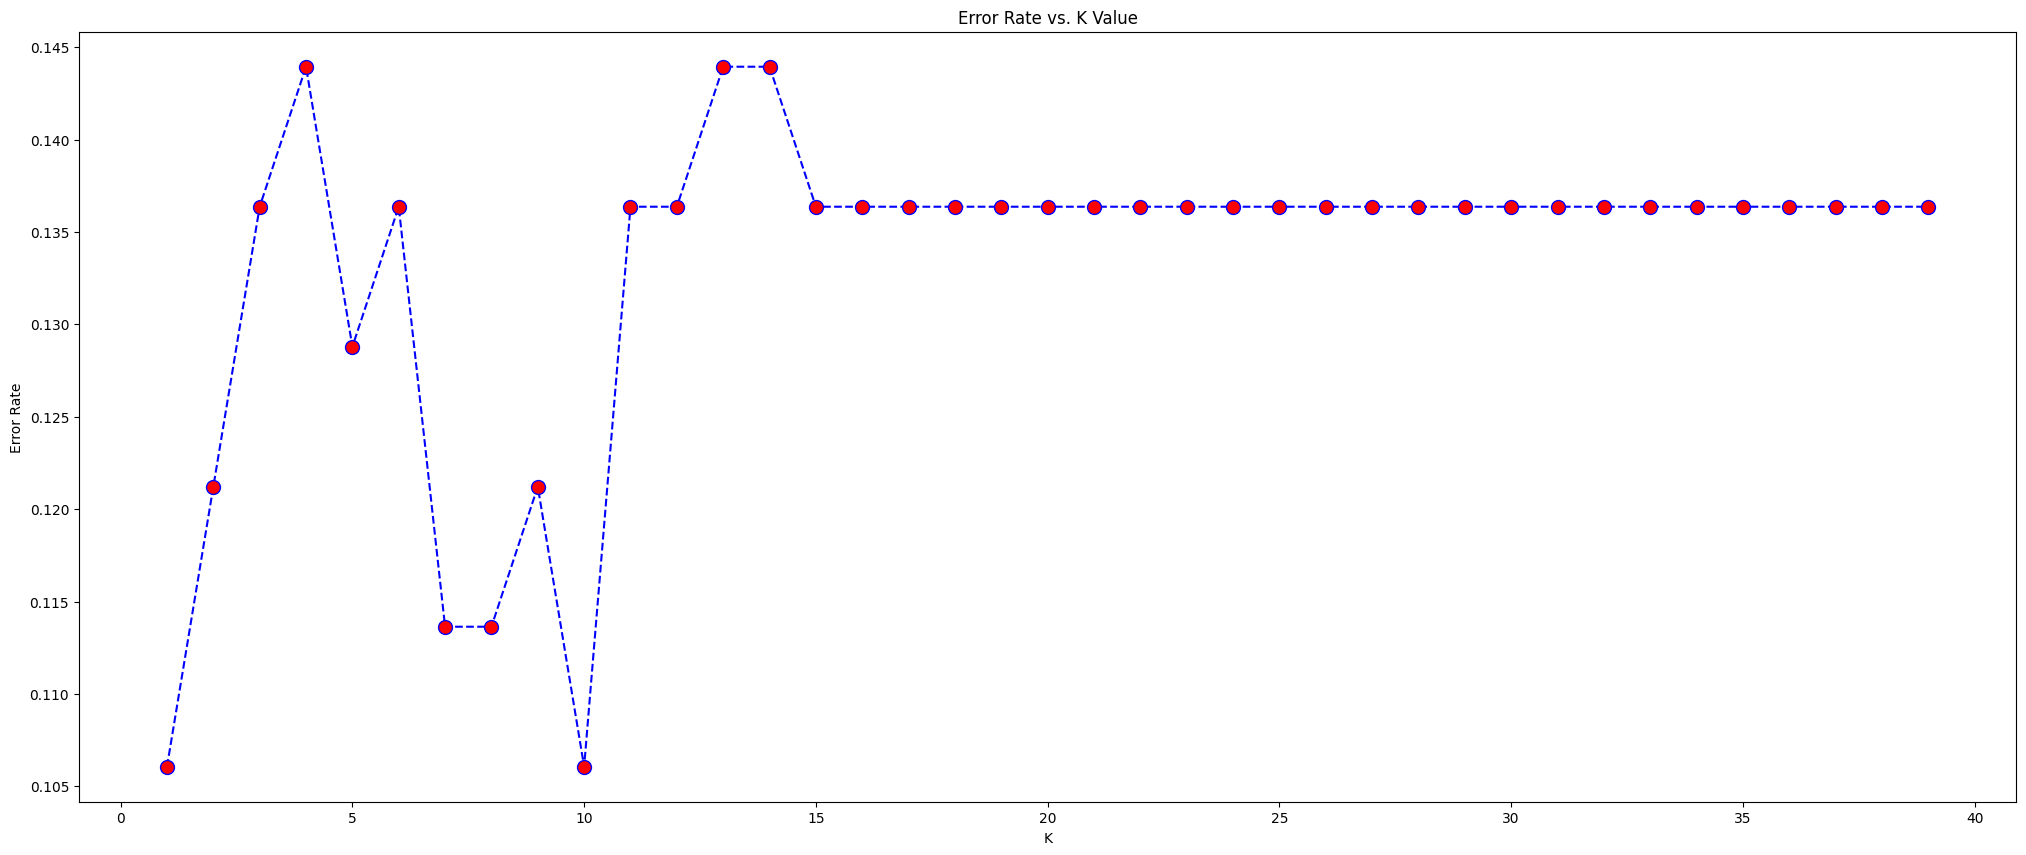

In [77]:
# plt.xkcd()
plt.figure(figsize=(25,10))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

*As we can see, there is no point in modelling for K > 10, since the error rate increases drastically. This is primarily 
because the Bayesian Boundary is likely to be non-linear. Just to check, I will model with K = 10. However, I am not expecting any significant improvement in accuracy over K = 1.*

In [78]:
knn10 = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

In [79]:
knnpred10 = knn10.predict(X_test)

In [80]:
print(confusion_matrix(y_test, knnpred10))

[[53 10]
 [ 4 65]]


In [82]:
print(classification_report(y_test, knnpred10))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        63
           1       0.87      0.94      0.90        69

    accuracy                           0.89       132
   macro avg       0.90      0.89      0.89       132
weighted avg       0.90      0.89      0.89       132



*As we can see, there is no significant change in model prediction accuracy. Now, for fun, let me do K = 11, which will highlight issues with overfitting a non-linear Bayesian Boundary.*

In [83]:
knn11 = KNeighborsClassifier(n_neighbors=11).fit(X_train, y_train)

In [84]:
knnpred11 = knn11.predict(X_test)

In [85]:
print(confusion_matrix(y_test, knnpred11))

[[49 14]
 [ 4 65]]


In [86]:
print(classification_report(y_test, knnpred11))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84        63
           1       0.82      0.94      0.88        69

    accuracy                           0.86       132
   macro avg       0.87      0.86      0.86       132
weighted avg       0.87      0.86      0.86       132



*As we can see, there is a drastic reduction in model prediction accuracy due to overfitting of test data.*